# Análisis de Crímenes 2024

Este notebook contiene el análisis exploratorio de datos sobre crímenes reportados en 2024.

## Importación de Librerías

Importamos las bibliotecas necesarias para el análisis de datos:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


sns.set_theme(style='whitegrid')

df = pd.read_csv('lib/Crimes_-_2024_20251122.csv')


print("Primeras 5 filas del dataset:")
display(df.head())
print('Data shape (filas, columnas)',df.shape)

print("Data types", df.dtypes)

columns = df.columns.tolist()
print("columns", columns)

print("Number of missing values (total):", df.isna().sum())
print("Number of columns with missing values:", (df.isna().any(axis=0)).sum())
print("Number of rows with missing values:", (df.isna().any(axis=1)).sum())


#todo - mapper object to camelCase columns
primary_col = "Primary Type"
location_description_col = "Location Description"
location_col = "Location"
arrest_col = "Arrest"



Primeras 5 filas del dataset:


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817.0,1860189.0,2024,11/02/2025 03:41:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740.0,1853048.0,2024,11/02/2025 03:41:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362.0,1861188.0,2024,11/02/2025 03:41:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


Data shape (filas, columnas) (258829, 22)
Data types ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
columns ['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year',

## Análisis de Tipos de Datos

A continuación se muestra una tabla detallada de los tipos de datos para cada columna del dataset:

In [3]:
# Tabla simple: id (nombre de la columna) y tipo_de_dato (dtype)
tipos_tabla = pd.DataFrame({
    'id': df.columns.tolist(),
    'tipo_de_dato': [str(df[col].dtype) for col in df.columns]
})

print("\nTabla con id y tipo de dato:")
display(tipos_tabla)


Tabla con id y tipo de dato:


,id,tipo_de_dato
0,ID,int64
1,Case Number,object
2,Date,object
3,Block,object
4,IUCR,object
5,Primary Type,object
6,Description,object
7,Location Description,object
8,Arrest,bool
9,Domestic,bool


Grafica de crimenes

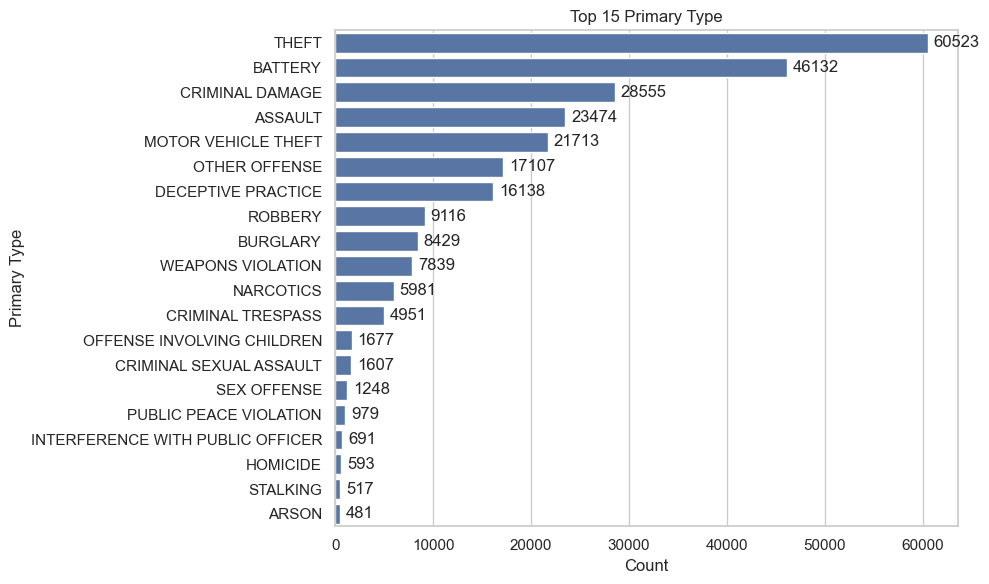

In [4]:
# crimenes
if primary_col in df.columns:
    pc = df[primary_col].fillna('Unknown')
    top = pc.value_counts().head(20)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top.values, y=top.index )
    plt.xlabel('Count')
    plt.title(f'Top 15 {primary_col}')
 
    for i, v in enumerate(top.values):
        plt.text(v + max(top.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'primary type'. Columnas disponibles:", list(df.columns))


Locations Description

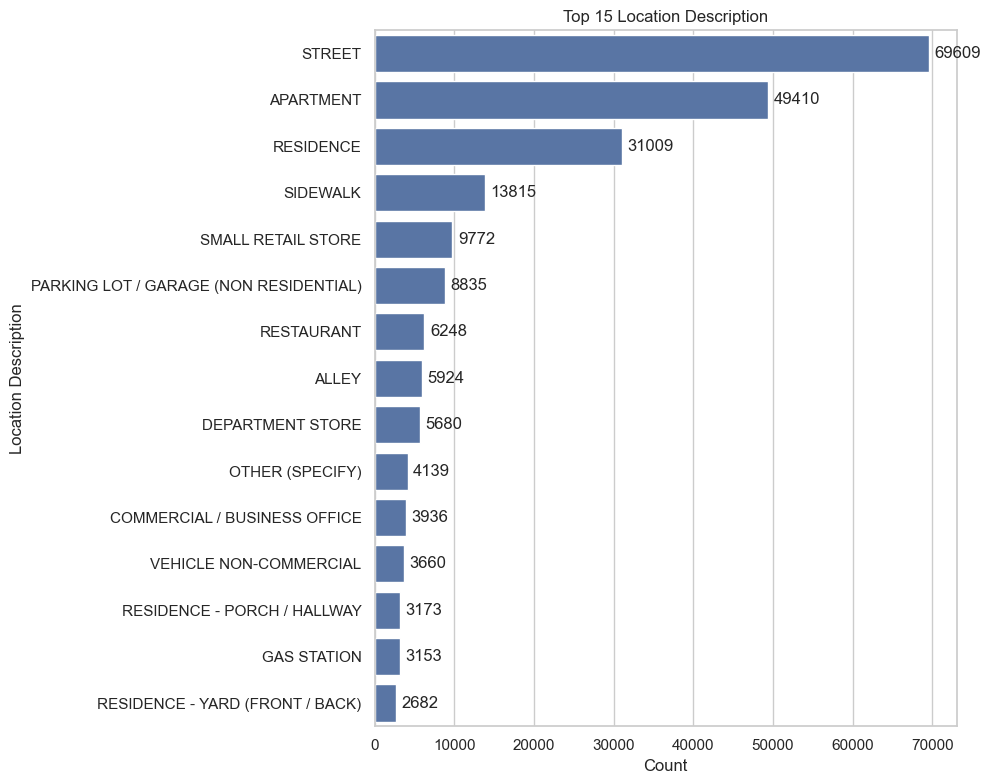

In [5]:
# locations_description
if location_description_col in df.columns:
    lc = df[location_description_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_description_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location description'. Columnas disponibles:", list(df.columns))

Location col (coordenadas)

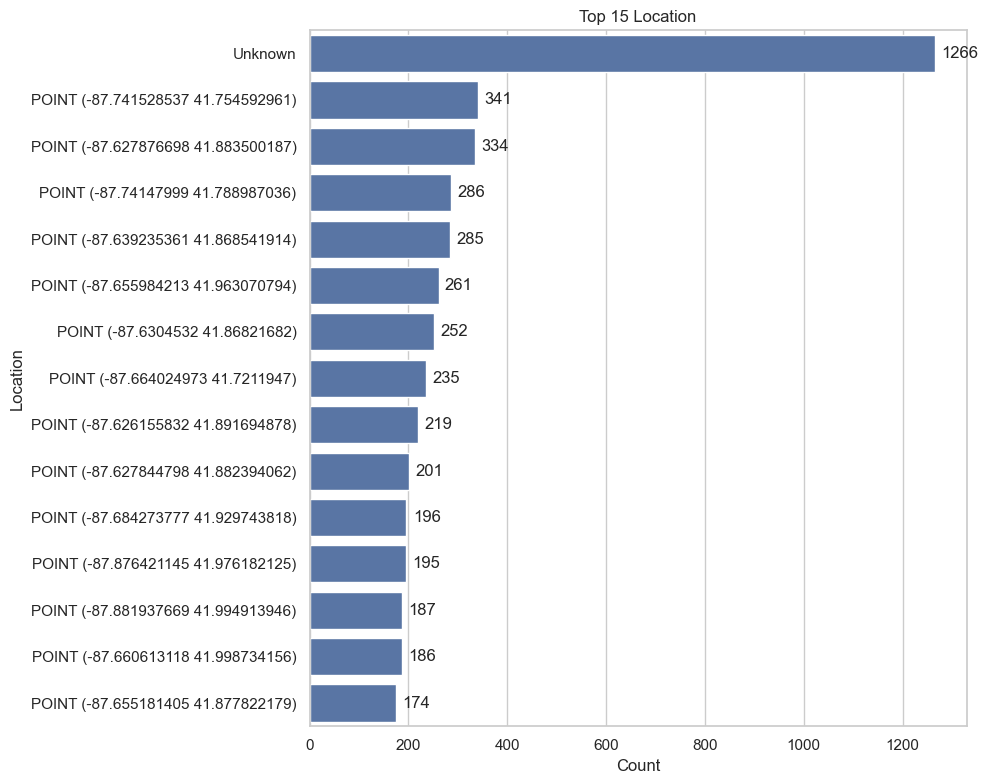

In [6]:
if location_col in df.columns:
    lc = df[location_col].fillna('Unknown')
    top_loc = lc.value_counts().head(15)
    plt.figure(figsize=(10,8))
    sns.barplot(x=top_loc.values, y=top_loc.index)
    plt.xlabel('Count')
    plt.title(f'Top 15 {location_col}')
    for i, v in enumerate(top_loc.values):
        plt.text(v + max(top_loc.values)*0.01, i, str(v), va='center')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontró columna para 'location'. Columnas disponibles:", list(df.columns))

Arrestos

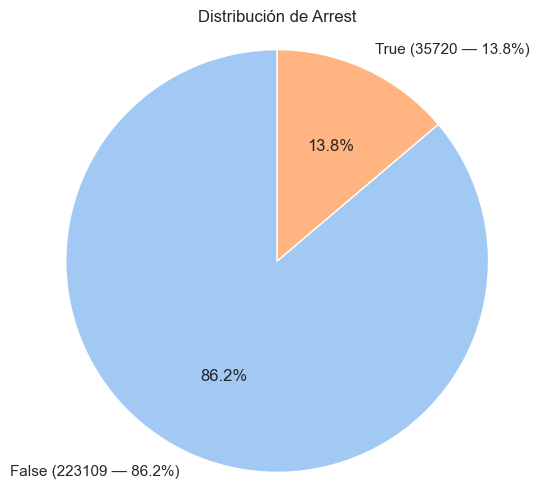

Conteos de arrest: Arrest
False    223109
True      35720
Name: count, dtype: int64


In [7]:
# distribucion de arrestos
if arrest_col in df.columns:
    ac = df[arrest_col].fillna('Unknown')
    counts = ac.value_counts(dropna=False)
    plt.figure(figsize=(6,6))
    labels = counts.index.astype(str)
    sizes = counts.values
    # Pie con etiquetas que contienen conteo y porcentaje
    plt.pie(sizes, labels=[f"{l} ({v} — {v/sizes.sum():.1%})" for l,v in zip(labels,sizes)],
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Distribución de {arrest_col}')
    plt.axis('equal')
    plt.show()
    print('Conteos de arrest:', counts)
else:
    print("No se encontró columna para 'arrest'. Columnas disponibles:", list(df.columns))

#### Analsis de nulos (Alejandro y Julia)

In [8]:
# duplicados en columna id
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

Empty DataFrame
Columns: [ID, Case Number, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, Beat, District, Ward, Community Area, FBI Code, X Coordinate, Y Coordinate, Year, Updated On, Latitude, Longitude, Location]
Index: []

[0 rows x 22 columns]


Vemos que no encontramos registros duplicados

In [9]:
# duplicados en Case Number
df[df['Case Number'].duplicated(keep='last')]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12138,28521,JH539697,12/12/2024 03:40:00 AM,094XX S LA SALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,9,49,01A,1176941.0,1842351.0,2024,12/20/2024 03:42:06 PM,41.722749,-87.627480,POINT (-87.627480265 41.722748857)
18445,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
18446,28505,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
30954,28482,JH505655,11/12/2024 10:37:00 PM,024XX S NORMAL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,11,34,01A,1173142.0,1888242.0,2024,11/20/2024 03:42:13 PM,41.848763,-87.640040,POINT (-87.640040128 41.84876345)
36030,28470,JH496538,11/05/2024 02:40:00 PM,006XX E GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,OFFICE,True,False,...,42,8,01A,1180796.0,1904058.0,2024,11/13/2024 03:41:09 PM,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
36409,28468,JH495872,11/04/2024 09:30:00 PM,080XX S INGLESIDE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,8,44,01A,1183960.0,1851854.0,2024,11/12/2024 03:41:00 PM,41.748665,-87.601475,POINT (-87.601474713 41.748665338)
56490,28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
101412,28306,JH380746,08/08/2024 10:28:00 PM,034XX W DOUGLAS BLVD,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,24,29,01A,1153696.0,1893244.0,2024,08/16/2024 03:41:00 PM,41.862898,-87.711276,POINT (-87.711275792 41.862898145)
105401,28297,JH373821,08/03/2024 07:10:00 PM,048XX S WINCHESTER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,15,61,01A,1164171.0,1872522.0,2024,01/26/2025 03:40:46 PM,41.805820,-87.673408,POINT (-87.673407538 41.805820086)
111997,28285,JH362433,07/26/2024 12:06:00 PM,025XX W 46TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,15,58,01A,1160088.0,1874086.0,2024,08/03/2024 03:40:46 PM,41.810197,-87.688339,POINT (-87.688339453 41.810196952)


29 registros duplicados con el mismo "Case Number". Serán registros duplicados o actualizaciones de los incidentes?

In [10]:
# Numero de registros por primary type

In [11]:
df[df.duplicated(subset=df.columns.difference(['ID']), keep="last")]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
18445,28506,JH528033,12/02/2024 05:20:00 PM,035XX W 59TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,...,14,66,01A,1153865.0,1865267.0,2024,12/10/2024 03:41:06 PM,41.786122,-87.711399,POINT (-87.711398843 41.78612225)
56490,28414,JH459847,10/07/2024 10:45:00 PM,078XX S WESTERN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,True,False,...,18,70,01A,1161739.0,1852605.0,2024,10/15/2024 03:41:39 PM,41.751216,-87.682880,POINT (-87.682879763 41.751216002)
128182,28235,JH333940,07/05/2024 07:12:00 AM,036XX E 87TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,10,46,01A,1202185.0,1848046.0,2024,10/23/2025 03:45:36 PM,41.737771,-87.534823,POINT (-87.534822726 41.737771151)
137524,28199,JH317789,06/23/2024 08:44:00 AM,123XX S HALSTED ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9,53,01A,1173228.0,1823102.0,2024,07/22/2025 03:42:18 PM,41.670009,-87.641647,POINT (-87.641646732 41.670009388)
156342,28148,JH284448,05/30/2024 02:16:00 AM,028XX S SACRAMENTO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,25,30,01A,1156822.0,1885102.0,2024,06/07/2024 03:41:01 PM,41.840493,-87.700021,POINT (-87.700020957 41.840492863)
160238,28132,JH277783,05/24/2024 11:43:00 PM,047XX N TROY ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,33,14,01A,1154526.0,1931236.0,2024,06/01/2024 03:41:31 PM,41.967135,-87.707211,POINT (-87.707210776 41.967134886)
211036,28024,JH185734,03/13/2024 12:40:00 AM,002XX W 109TH PL,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,9,49,01A,1176725.0,1832329.0,2024,03/21/2024 03:47:52 PM,41.695252,-87.628572,POINT (-87.62857189 41.695251946)
211369,28019,JH185103,03/12/2024 03:45:00 PM,069XX S STATE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,6,69,01A,1177495.0,1859111.0,2024,03/20/2024 03:41:02 PM,41.768728,-87.624946,POINT (-87.624945647 41.768727829)


Vemos que hay 8 registros exactamente iguales sin considerar la columna unica de "ID"

In [12]:
# Ordenar por Case Number y Date descendente (fecha más reciente arriba)
df_sorted = df.sort_values(by=['Case Number', 'Date'], ascending=[True, False])

# Mantener solo el primer registro por Case Number (la más reciente)
df_no_case_duplicates = df_sorted.drop_duplicates(subset='Case Number', keep='first')

In [13]:
# Lista de columnas sin 'ID'
cols_sin_id = df_no_case_duplicates.columns.difference(['ID'])

# Eliminar duplicados exactos
df_cleaned = df_no_case_duplicates.drop_duplicates(subset=cols_sin_id, keep='first')

In [14]:
print("Registros originales:", len(df))
print("Después de limpiar Case Number:", len(df_no_case_duplicates))
print("Después de eliminar duplicados exactos:", len(df_cleaned))

Registros originales: 258829
Después de limpiar Case Number: 258800
Después de eliminar duplicados exactos: 258800


In [15]:
df.isna()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258824,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
258825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,True,True,True
258826,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258827,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#Proporcion de valores nules en cada columna
df.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1096
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            1266
Y Coordinate            1266
Year                       0
Updated On                 0
Latitude                1266
Longitude               1266
Location                1266
dtype: int64

In [17]:
# Calcular la proporción de valores nulos en cada columna
df.isna().mean().round(4) * 100

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.42
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    0.00
Community Area          0.00
FBI Code                0.00
X Coordinate            0.49
Y Coordinate            0.49
Year                    0.00
Updated On              0.00
Latitude                0.49
Longitude               0.49
Location                0.49
dtype: float64

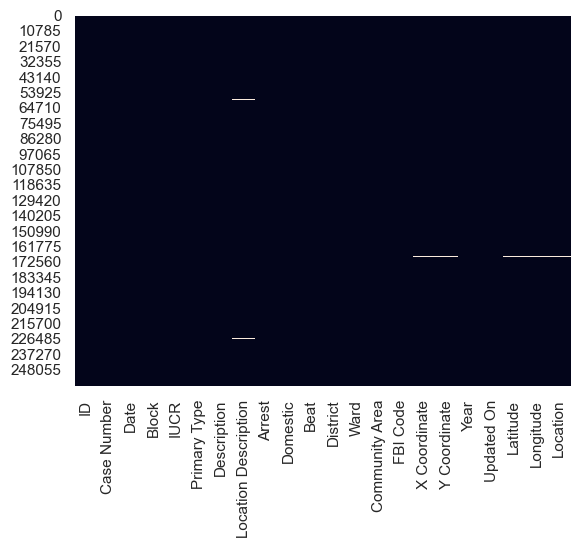

In [18]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

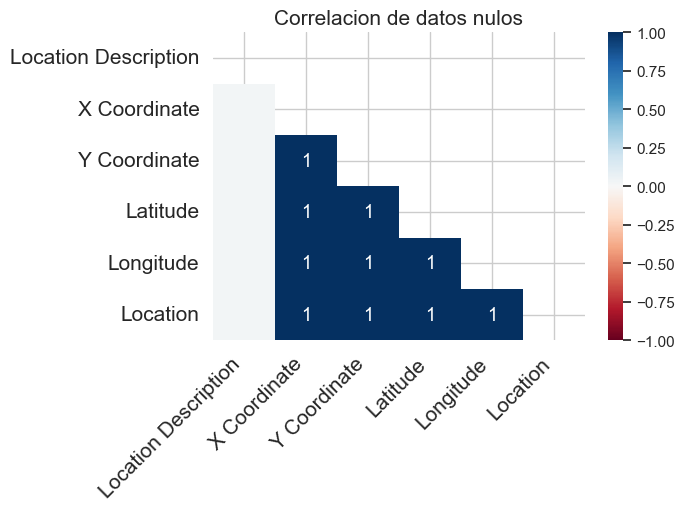

In [23]:
msno.heatmap(df, fontsize=15, figsize=(6,4))
plt.title("Correlacion de datos nulos", fontsize=15)
plt.show()

In [33]:
#Analisis de location description
df["LocDesc_is_null"] = df["Location Description"].isna().astype(int)

location_numeric = ["Beat", "District", "Ward", "Community Area", "LocDesc_is_null"]

df[location_numeric].corr()

,Beat,District,Ward,Community Area,LocDesc_is_null
Beat,1.000000,0.999816,0.652652,-0.478653,0.016253
District,0.999816,1.000000,0.653493,-0.478886,0.016259
Ward,0.652652,0.653493,1.000000,-0.541497,0.021085
Community Area,-0.478653,-0.478886,-0.541497,1.000000,-0.025731
LocDesc_is_null,0.016253,0.016259,0.021085,-0.025731,1.000000


In [26]:
pd.crosstab(df["Location Description"], df["Primary Type"])

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,8,3,9,21,0,23,6,16,3,0,...,0,7,0,0,2,6,1,0,20,3
AIRCRAFT,0,3,21,0,0,1,0,0,4,0,...,0,1,0,0,4,0,0,0,19,0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0,9,14,0,0,4,1,5,34,0,...,0,2,0,0,0,0,0,0,24,1
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0,2,7,0,1,1,0,0,2,0,...,0,6,0,0,0,1,0,1,37,0
AIRPORT EXTERIOR - NON-SECURE AREA,0,8,13,1,0,9,2,5,14,0,...,0,6,0,0,9,1,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE - DELIVERY TRUCK,0,0,2,2,0,4,0,2,2,0,...,0,0,0,0,0,2,0,0,31,0
"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",0,8,30,0,0,4,0,0,19,0,...,0,2,1,0,0,11,5,0,35,4
VEHICLE NON-COMMERCIAL,21,100,399,68,4,541,21,37,36,0,...,0,144,0,0,7,91,15,1,1245,144


In [27]:
pd.crosstab(df["Location Description"], df["Primary Type"], normalize="index")

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,0.053333,0.020000,0.060000,0.140000,0.000000,0.153333,0.040000,0.106667,0.020000,0.0,...,0.0,0.046667,0.000000,0.0,0.013333,0.040000,0.006667,0.000000,0.133333,0.020000
AIRCRAFT,0.000000,0.052632,0.368421,0.000000,0.000000,0.017544,0.000000,0.000000,0.070175,0.0,...,0.0,0.017544,0.000000,0.0,0.070175,0.000000,0.000000,0.000000,0.333333,0.000000
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.000000,0.085714,0.133333,0.000000,0.000000,0.038095,0.009524,0.047619,0.323810,0.0,...,0.0,0.019048,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.228571,0.009524
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.000000,0.033333,0.116667,0.000000,0.016667,0.016667,0.000000,0.000000,0.033333,0.0,...,0.0,0.100000,0.000000,0.0,0.000000,0.016667,0.000000,0.016667,0.616667,0.000000
AIRPORT EXTERIOR - NON-SECURE AREA,0.000000,0.076190,0.123810,0.009524,0.000000,0.085714,0.019048,0.047619,0.133333,0.0,...,0.0,0.057143,0.000000,0.0,0.085714,0.009524,0.000000,0.000000,0.238095,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEHICLE - DELIVERY TRUCK,0.000000,0.000000,0.042553,0.042553,0.000000,0.085106,0.000000,0.042553,0.042553,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.042553,0.000000,0.000000,0.659574,0.000000
"VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)",0.000000,0.064516,0.241935,0.000000,0.000000,0.032258,0.000000,0.000000,0.153226,0.0,...,0.0,0.016129,0.008065,0.0,0.000000,0.088710,0.040323,0.000000,0.282258,0.032258
VEHICLE NON-COMMERCIAL,0.005738,0.027322,0.109016,0.018579,0.001093,0.147814,0.005738,0.010109,0.009836,0.0,...,0.0,0.039344,0.000000,0.0,0.001913,0.024863,0.004098,0.000273,0.340164,0.039344


In [28]:
pd.crosstab(df["Primary Type"], df["LocDesc_is_null"], normalize="index")


LocDesc_is_null,0,1
Primary Type,,
ARSON,1.000000,0.000000
ASSAULT,0.999915,0.000085
BATTERY,1.000000,0.000000
BURGLARY,0.999881,0.000119
CONCEALED CARRY LICENSE VIOLATION,1.000000,0.000000
CRIMINAL DAMAGE,1.000000,0.000000
CRIMINAL SEXUAL ASSAULT,1.000000,0.000000
CRIMINAL TRESPASS,1.000000,0.000000
DECEPTIVE PRACTICE,0.932272,0.067728


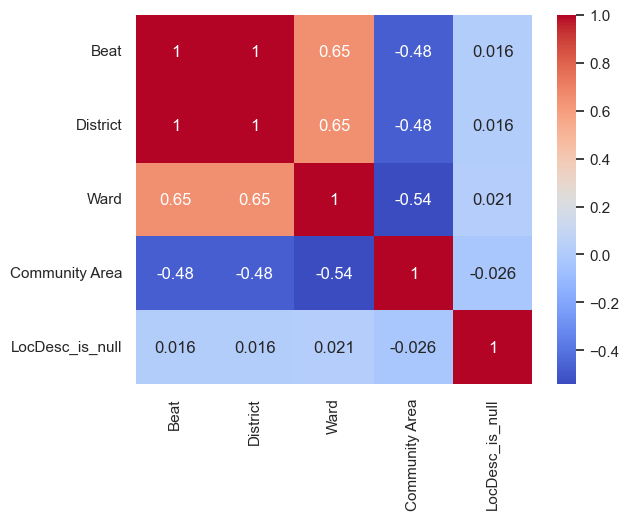

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[location_numeric].corr(), annot=True, cmap="coolwarm")
plt.show()


Las variables de location son MAR. Los nulos de coordenadas siempre vienen juntos. Si no hay ubicacion exacta, se dejan vacios los demas campos pertinentes

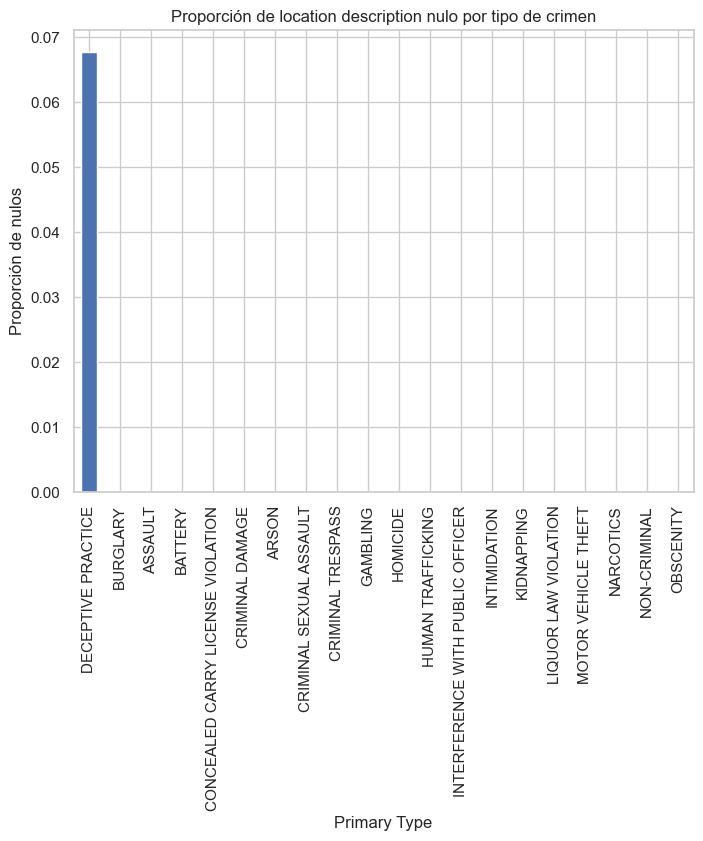

In [31]:
null_rate = df.groupby('Primary Type')['LocDesc_is_null'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
null_rate.head(20).plot(kind='bar')
plt.ylabel("Proporción de nulos")
plt.title("Proporción de location description nulo por tipo de crimen")
plt.show()

In [39]:
# Supongamos que tu DataFrame se llama df
# Filtramos los casos donde cualquiera de las columnas de interés es nula
cols_de_interes = ['Location Description', 'Latitude', 'Longitude', 'Location', 'X Coordinate', 'Y Coordinate']
df_nulos = df[df[cols_de_interes].isnull().any(axis=1)]

# Agrupamos por 'Primary Type' para ver qué tipos de crímenes tienen valores nulos en esas columnas
nulos_por_tipo = df_nulos.groupby('Primary Type')[cols_de_interes].apply(lambda x: x.isnull().sum())

# Mostrar el resultado
print(nulos_por_tipo)


                                  Location Description  Latitude  Longitude  \
Primary Type                                                                  
ARSON                                                0         2          2   
ASSAULT                                              2        96         96   
BATTERY                                              0       174        174   
BURGLARY                                             1        32         32   
CRIMINAL DAMAGE                                      0       106        106   
CRIMINAL SEXUAL ASSAULT                              0        29         29   
CRIMINAL TRESPASS                                    0        29         29   
DECEPTIVE PRACTICE                                1093       238        238   
HOMICIDE                                             0         1          1   
INTERFERENCE WITH PUBLIC OFFICER                     0         4          4   
INTIMIDATION                                        

Tipo de nulos en variable location description: Los nulos dependen claramente del tipo de crimen, en particular de DECEPTIVE PRACTICE, un grupo dominado por delitos como fraude, estafas y transacciones engañosas, que muchas veces no tienen un “lugar físico identificable”.

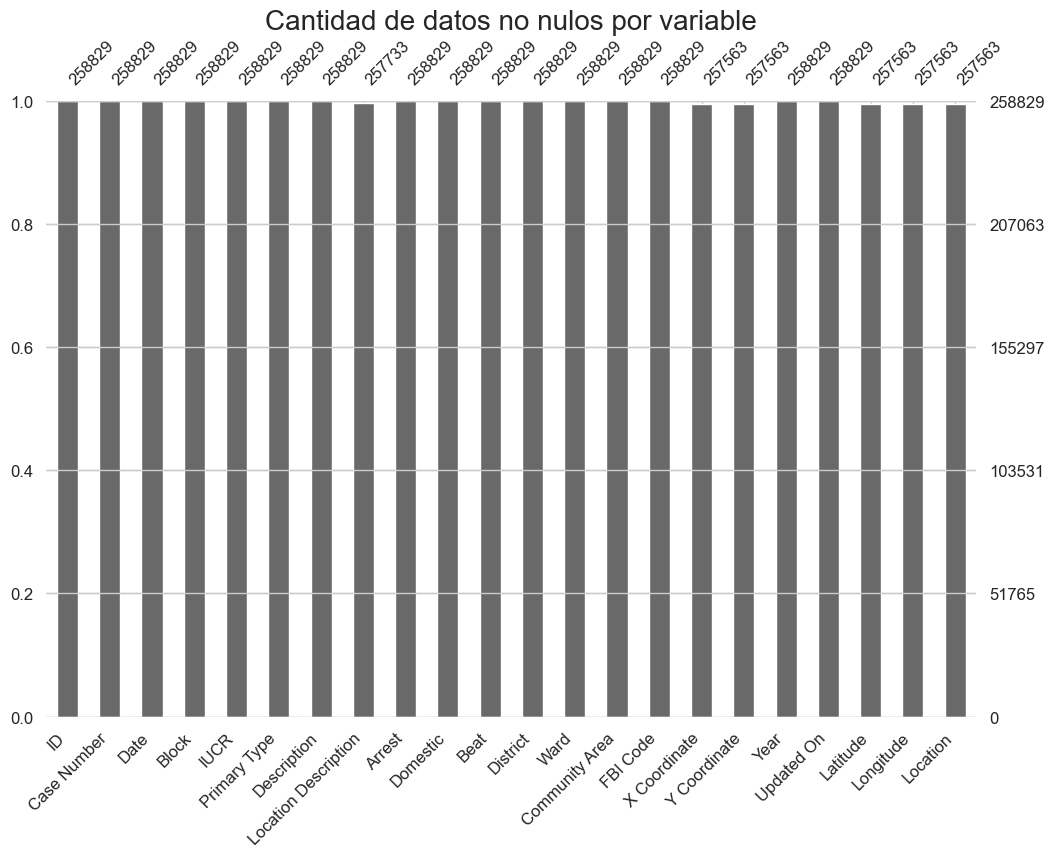

In [ ]:
msno.bar(df, fontsize=12, figsize=(12,8))
plt.title("Cantidad de datos no nulos por variable", fontsize=20)
plt.show()

#### Eliminacion de datos faltantes



In [ ]:
df_final = df_cleaned.dropna()
print("Numero de registros dataset limpio", len(df_final))

Numero de registros dataset limpio 256479


Funciones auxiliares

In [ ]:
# Función para calcular la entropía de Shannon
def shannon_entropy(y):
    probs = y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))


In [ ]:
# Función para graficar la distribución de la variable target
def plot(y):
    fig, axes = plt.subplots(figsize=(4, 4))
    sns.countplot(x=y, hue=y, palette="Set2", ax=axes)
    
    axes.set_xlabel("Survived")
    axes.set_ylabel("Cantidad")
    axes.set_title(f"Distribución de la variable {target}")

    plt.tight_layout()
    plt.show()

In [ ]:
# Evaluación del desbalance
def info(y):
    print("Proporción de clases:")
    print(y.value_counts(normalize=True))
    entropy = shannon_entropy(y)
    print("\nEntropía de Shannon:", entropy)
    plot(y)

In [ ]:
df_final.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
205292,13405346,HG196301,03/21/2024 12:40:00 PM,037XX W 111TH ST,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,STREET,True,False,...,19,74,24,1153412.0,1830732.0,2024,12/21/2024 03:40:46 PM,41.691361,-87.713971,POINT (-87.713971072 41.691361226)
222592,13379346,HJ165002,02/25/2024 04:30:00 AM,047XX N WESTERN AVE,0460,BATTERY,SIMPLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,40,4,08B,1159514.0,1931395.0,2024,12/21/2024 03:40:46 PM,41.967470,-87.688866,POINT (-87.688866088 41.9674697)
189734,28224,HV549611,04/13/2024 09:13:00 PM,003XX W 47TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,3,37,01A,1174595.0,1873785.0,2024,07/05/2024 03:41:01 PM,41.809060,-87.635139,POINT (-87.635138753 41.809059884)
176695,28804,HY254277,05/02/2024 01:45:00 PM,016XX W LAKE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,27,28,01A,1165373.0,1901491.0,2024,07/27/2025 03:42:13 PM,41.885288,-87.668176,POINT (-87.668176151 41.88528843)
99465,28484,JF115268,08/11/2024 12:42:00 PM,011XX N RIDGEWAY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,27,23,01A,1151161.0,1907619.0,2024,11/20/2024 03:41:17 PM,41.902395,-87.720205,POINT (-87.72020457 41.902394713)


In [ ]:
target="Arrest"
X = df_final.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

info(y_train)

ValueError: Found input variables with inconsistent numbers of samples: [256479, 258829]